In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
from vinzy_imgdata_importer import img_data_importer

In [239]:
X, y, m = img_data_importer("D:\\Data Science & AI\\DL-CNN-RNN\\DL CNN & RNN\\data_tutos\\disease_detection")

Do you want to convert your image data to grey scale? y/n:  n
Do you want to resize your data? y/n [default:100x100]:  y
enter the size:  60


Generating, Shuffling & Mapping the Data...


Do you want to normalize your data? y/n [recommended]:  n
Do you want to save your data? y/n [will be saved using pickle]:  n


In [240]:
m

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [241]:
y = np.array(y)
y

array([0, 3, 2, ..., 2, 0, 2])

In [242]:
set(y)

{0, 1, 2, 3}

In [243]:
classes = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
classes

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [244]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

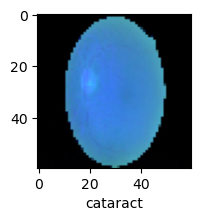

In [245]:
plot_sample(X, y, 0)

In [246]:
X.shape

(4217, 60, 60, 3)

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3373, 60, 60, 3), (844, 60, 60, 3), (3373,), (844,))

In [249]:
set(y_test)

{0, 1, 2, 3}

In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [251]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(60, 60, 3)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [252]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [98]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [99]:
print(f"loss:{loss}")
print(f"acc:{acc}")

loss:0.5927399396896362
acc:0.7902843356132507


In [100]:
y_pred = model.predict(X_test)

27/27 [==============================] - 1s 39ms/step


In [101]:
y_classes = [np.argmax(element) for element in y_pred]
set(y_classes)

{0, 1, 2, 3}

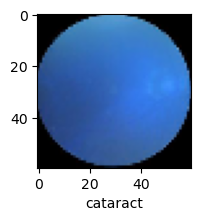

In [120]:
plot_sample(X_test, y_classes, 10)

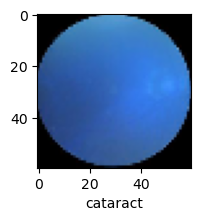

In [121]:
plot_sample(X_test, y_test, 10)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

In [123]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       199
           1       0.99      0.98      0.99       226
           2       0.78      0.59      0.68       207
           3       0.64      0.97      0.77       212

    accuracy                           0.79       844
   macro avg       0.81      0.78      0.78       844
weighted avg       0.81      0.79      0.78       844



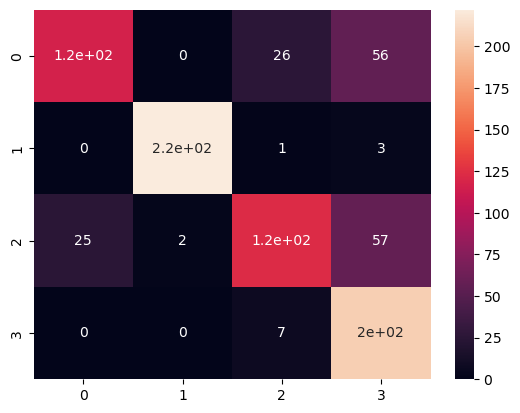

In [124]:
cn = confusion_matrix(y_test, y_classes)
sns.heatmap(cn, annot=True);